In [1]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
file=pd.ExcelFile(r"C:\Users\shiko\Desktop\projects\net anlysis\students.xlsx")
print(file.sheet_names)


['علوم طبية ', 'صيدلة وطب اسنان', 'العلوم الادارية', 'الهندسة', 'حاسب الى']


In [3]:
df=[file.parse(file.sheet_names[0]),
file.parse(file.sheet_names[1]),
file.parse(file.sheet_names[2]),
file.parse(file.sheet_names[3]),
file.parse(file.sheet_names[4])]
for i in range(5):
    df[i].dropna()
df[0].head()

,م,رقم الطالب,اسم الطالب,التخصص,رقم المقرر,اسم المقرر,رمز المقرر,رقم الشعبة
0,NaN,1105312002,عبدالمجيد علي عبدالرحمن الشاوي,السجلات الطبية-2,110501,المهارات اللغوية,ARAB 101,211637
1,NaN,1105311013,سالم سليمان دهش الشمري,السجلات الطبية-2,110501,المهارات اللغوية,ARAB 101,211637
2,NaN,1105312004,احمد عبدالله صالح الحربي,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,111647
3,NaN,1105321021,يوسف عبدالله سليمان المهوس,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,211647
4,NaN,1105312011,سطام بندر جايز المطيري,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,211647


In [4]:

missing_values=df[0].isna().sum()
print(missing_values)
duplicates =df[0].duplicated().sum()
print(duplicates)


م             1262
رقم الطالب       0
اسم الطالب       0
التخصص           0
رقم المقرر       0
اسم المقرر       0
رمز المقرر       0
رقم الشعبة       0
dtype: int64
0


In [5]:
df[0].drop('م',axis=1)

,رقم الطالب,اسم الطالب,التخصص,رقم المقرر,اسم المقرر,رمز المقرر,رقم الشعبة
0,1105312002,عبدالمجيد علي عبدالرحمن الشاوي,السجلات الطبية-2,110501,المهارات اللغوية,ARAB 101,211637
1,1105311013,سالم سليمان دهش الشمري,السجلات الطبية-2,110501,المهارات اللغوية,ARAB 101,211637
2,1105312004,احمد عبدالله صالح الحربي,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,111647
3,1105321021,يوسف عبدالله سليمان المهوس,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,211647
4,1105312011,سطام بندر جايز المطيري,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,211647
...,...,...,...,...,...,...,...
1257,1104312005,سلطان سعد حليس الرشيدي,العلوم الإشعاعية,110113,مهن ونظم الرعاية الصحية,241 صحة,111210
1258,1104312004,احمد دحيدح درويش الرشيدي,العلوم الإشعاعية,110113,مهن ونظم الرعاية الصحية,241 صحة,111210
1259,1104312001,عبدالاله ماجد ضيف الله العتيبي,العلوم الإشعاعية,110113,مهن ونظم الرعاية الصحية,241 صحة,111210
1260,1101321005,أيمن أسامه محمد دحلان,العلاج الطبيعي,110113,مهن ونظم الرعاية الصحية,241 صحة,111208


In [6]:
def fix(text):
    return get_display(arabic_reshaper.reshape(text))

def fixdfs(size,dfs):
    lis=[None]*size  
    for i in range(size):
        lis[i]=get_display(arabic_reshaper.reshape(dfs[i]))
    return lis

In [7]:
علوم_طبيه=df[0].groupby("اسم المقرر")["اسم الطالب"].count().reset_index()
علوم_طبيه.rename(columns={'اسم الطالب': 'عدد الطلاب'}, inplace=True)
علوم_طبيه



,اسم المقرر,عدد الطلاب
0,Biology,1
1,English Language 2,3
2,General Physics,2
3,HIM Clinical Education II,4
4,Health Care Planning,1
...,...,...
98,ممارسة إكلينكية في العلاج الطبيعي,2
99,ممارسة اكلينكية في العلاج بالأشعة,1
100,ممارسة اكلينكية لأجهزة الاشعة المتحركة,1
101,ممارسه اكلينيكيه في التغذية2,1


C:\Users\shiko\AppData\Local\Temp\ipykernel_12824\1429442217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=علوم_طبيه,x='اسم المقرر',y='عدد الطلاب',palette='flare')


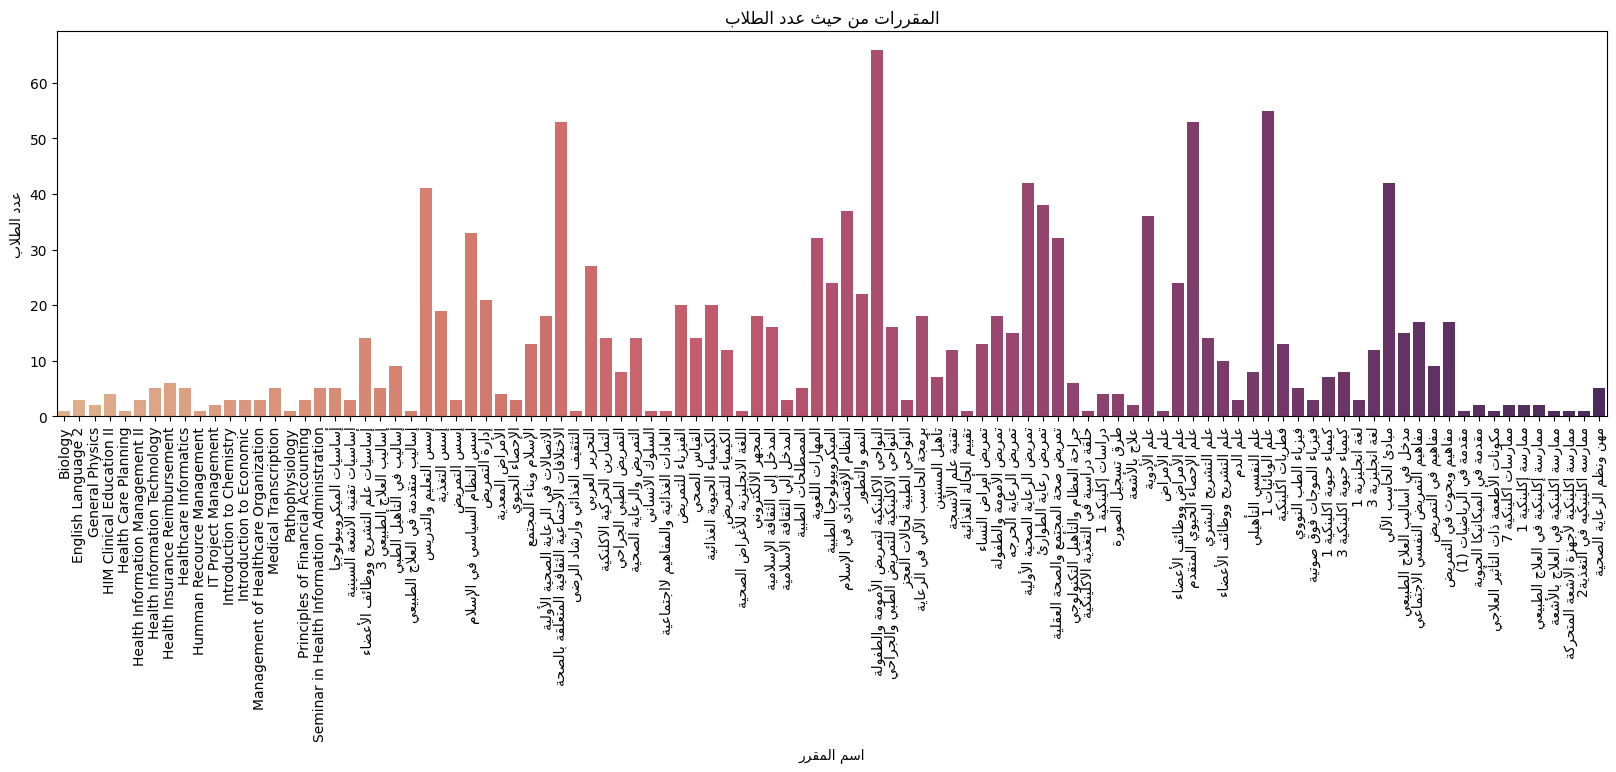

In [8]:

plt.figure(figsize=(20,5))
sns.barplot(data=علوم_طبيه,x='اسم المقرر',y='عدد الطلاب',palette='flare')
plt.xticks(rotation=90,ticks=range(len(علوم_طبيه['اسم المقرر'])),labels=fixdfs(103,علوم_طبيه["اسم المقرر"]))
plt.title(fix('المقررات من حيث عدد الطلاب'))
plt.ylabel(fix('عدد الطلاب'))
plt.xlabel(fix('اسم المقرر'))
plt.show()

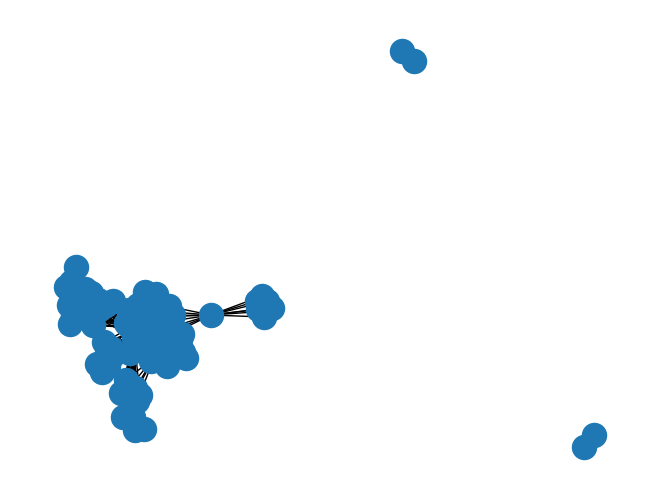

In [9]:
G = nx.Graph()
courses = df[0]["اسم المقرر"].unique()
G.add_nodes_from(courses)

for student_id, group in df[0].groupby("رقم الطالب"):
    student_courses = group["اسم المقرر"].tolist()
    for i in range(len(student_courses)):
        for j in range(i + 1, len(student_courses)):
            G.add_edge(student_courses[i], student_courses[j])
nx.draw(G)

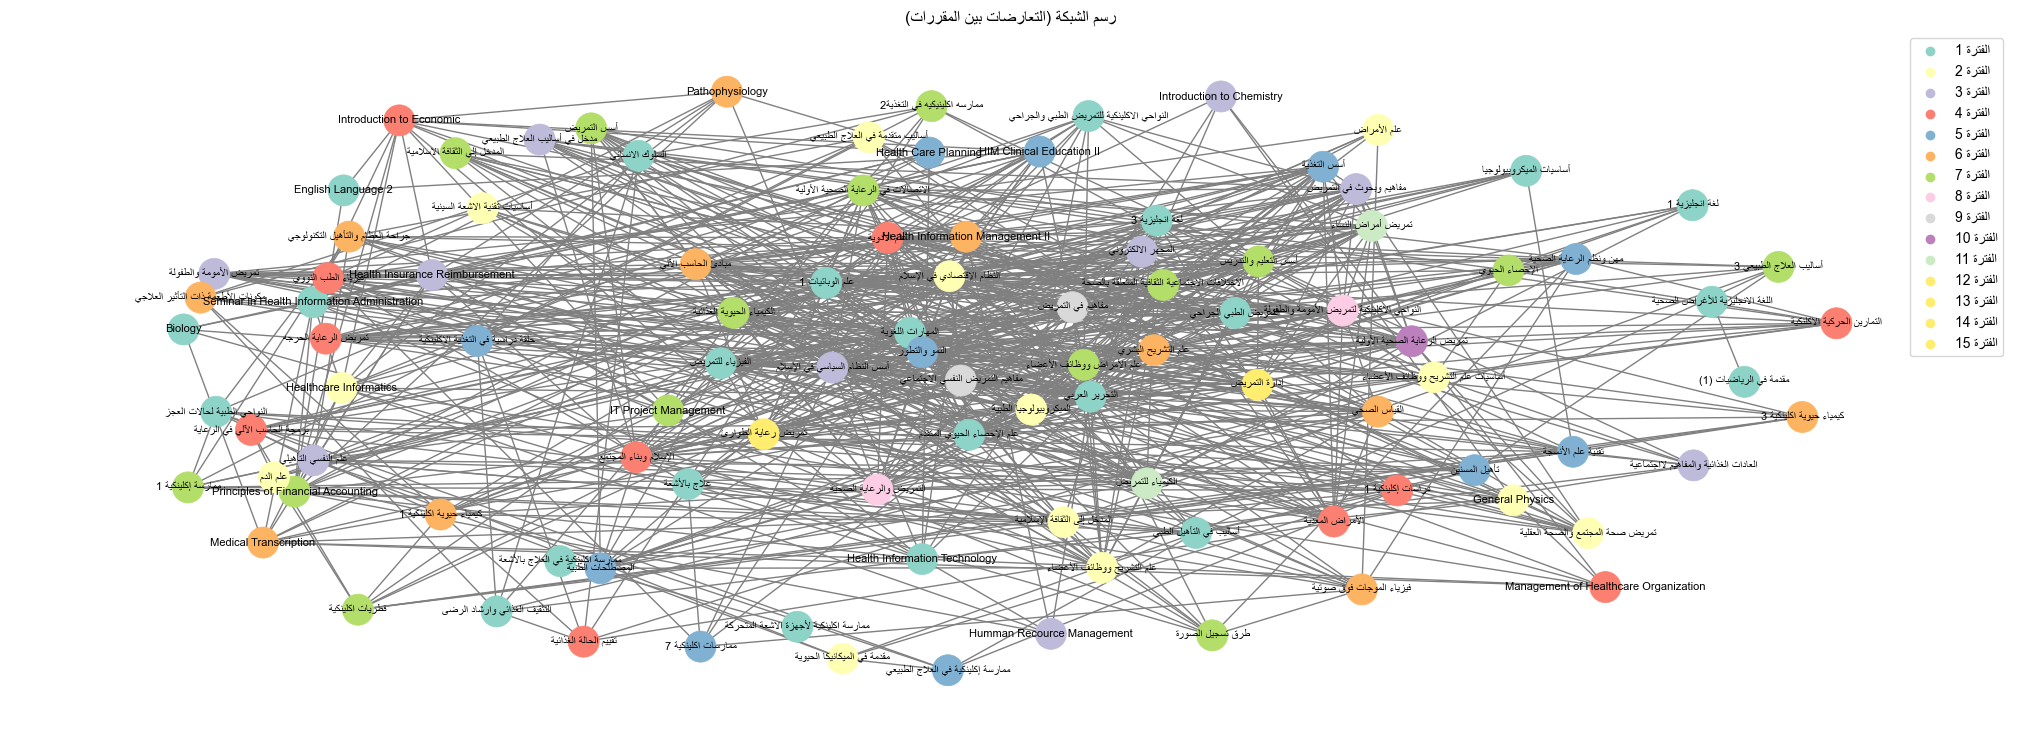

In [10]:
color = nx.greedy_color(G, strategy="largest_first")
lf_periods = len(set(color.values()))

node_colors = [color[course] for course in G.nodes()]

unique_periods = sorted(set(color.values()))
period_labels = {period: f"الفترة {period + 1}" for period in unique_periods}

plt.figure(figsize=(20, 7)) 
pos = nx.spring_layout(G, k=0.8, iterations=20)  

nx.draw(G, pos, with_labels=False, node_size=500, node_color=node_colors, cmap=plt.cm.Set3, edge_color="gray", linewidths=0.5)

labels = {node:fix(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_family="Arial")

for period in unique_periods:
    plt.scatter([], [], c=[plt.cm.Set3(period)], label=fix(f"الفترة {period + 1}"))
plt.legend(scatterpoints=1, loc="best", fontsize=8, prop={'family': 'Arial'})
plt.title(fix("رسم الشبكة (التعارضات بين المقررات)"), fontfamily="Arial")
plt.show()

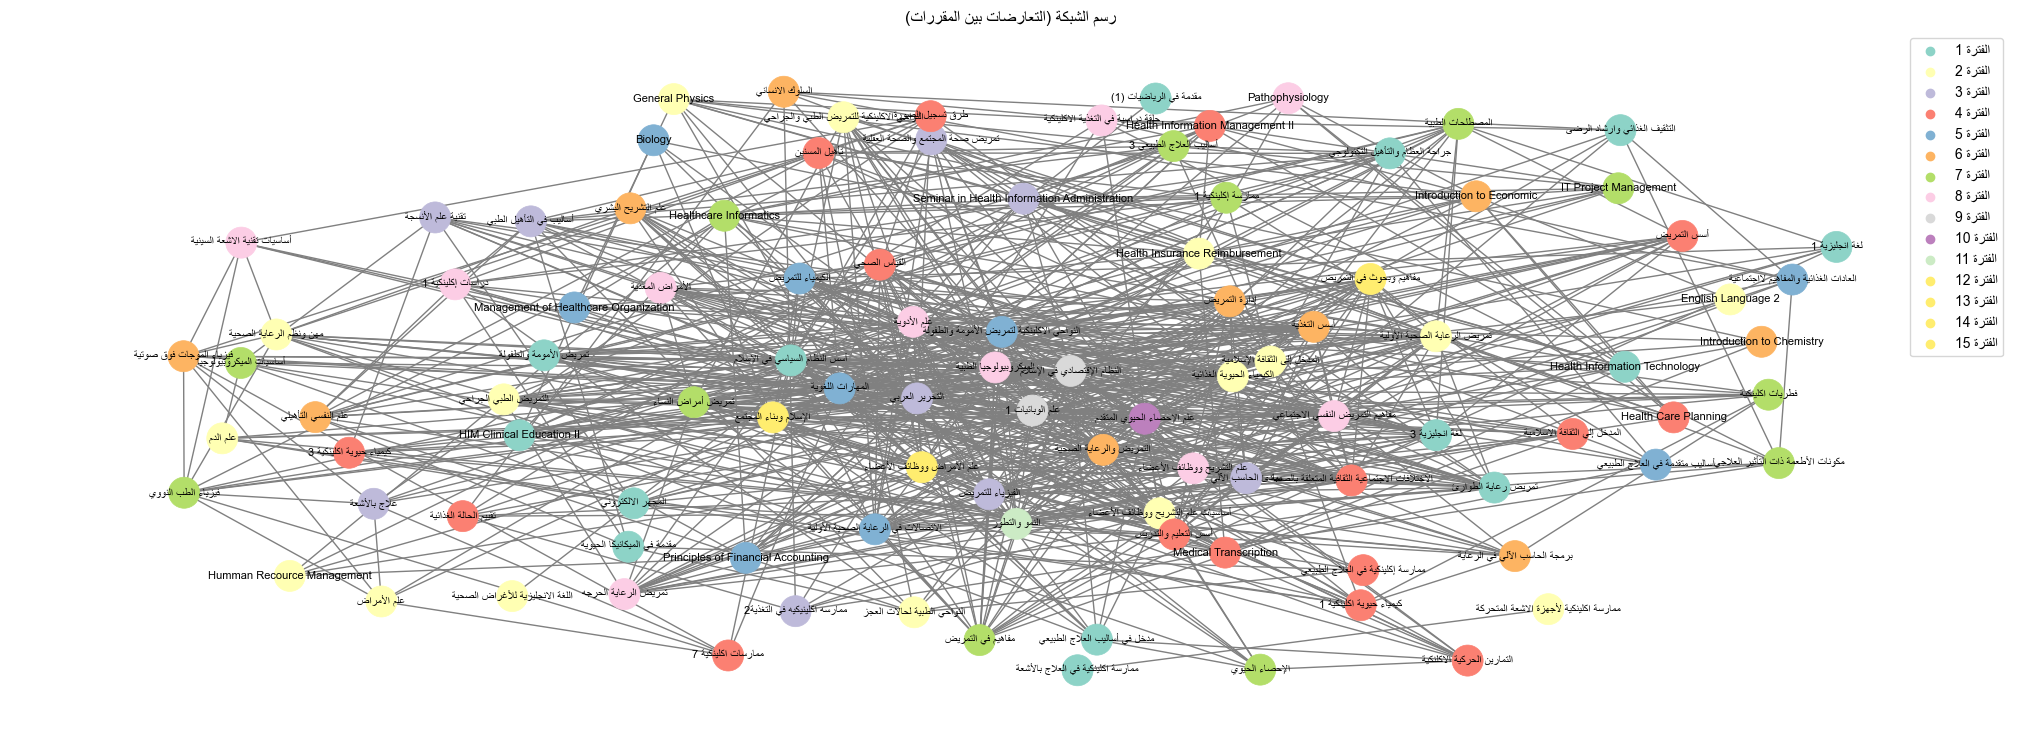

In [11]:
color2 = nx.greedy_color(G, strategy="smallest_last")
lf_periods2 = len(set(color2.values()))

node_colors2 = [color2[course] for course in G.nodes()]

unique_periods2 = sorted(set(color2.values()))
period_labels2 = {period: f"الفترة {period + 1}" for period in unique_periods2}

plt.figure(figsize=(20, 7)) 
pos = nx.spring_layout(G, k=0.8, iterations=20)  

nx.draw(G, pos, with_labels=False, node_size=500, node_color=node_colors2, cmap=plt.cm.Set3, edge_color="gray", linewidths=0.5)

labels = {node: fix(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_family="Arial")

for period in unique_periods:
    plt.scatter([], [], c=[plt.cm.Set3(period)], label=fix(f"الفترة {period + 1}"))
plt.legend(scatterpoints=1, loc="best", fontsize=8, prop={'family': 'Arial'})
plt.title(fix("رسم الشبكة (التعارضات بين المقررات)"), fontfamily="Arial")
plt.show()

In [12]:
total_students = علوم_طبيه["عدد الطلاب"].sum()
total_courses = len(علوم_طبيه)
max_students_course = علوم_طبيه.loc[علوم_طبيه["عدد الطلاب"].idxmax()]
min_students_course =علوم_طبيه.loc[علوم_طبيه["عدد الطلاب"].idxmin()]

print(f"إجمالي عدد المقررات: {total_courses}")
print(f"إجمالي عدد الطلاب: {total_students}")
print(f"المقرر بأكبر عدد طلاب: {max_students_course['اسم المقرر']} ({max_students_course['عدد الطلاب']} طالب)")
print(f"المقرر بأقل عدد طلاب: {min_students_course['اسم المقرر']} ({min_students_course['عدد الطلاب']} طالب)")

إجمالي عدد المقررات: 103
إجمالي عدد الطلاب: 1262
المقرر بأكبر عدد طلاب: النواحي الاكلينكية لتمريض الأمومة والطفولة (66 طالب)
المقرر بأقل عدد طلاب: Biology (1 طالب)


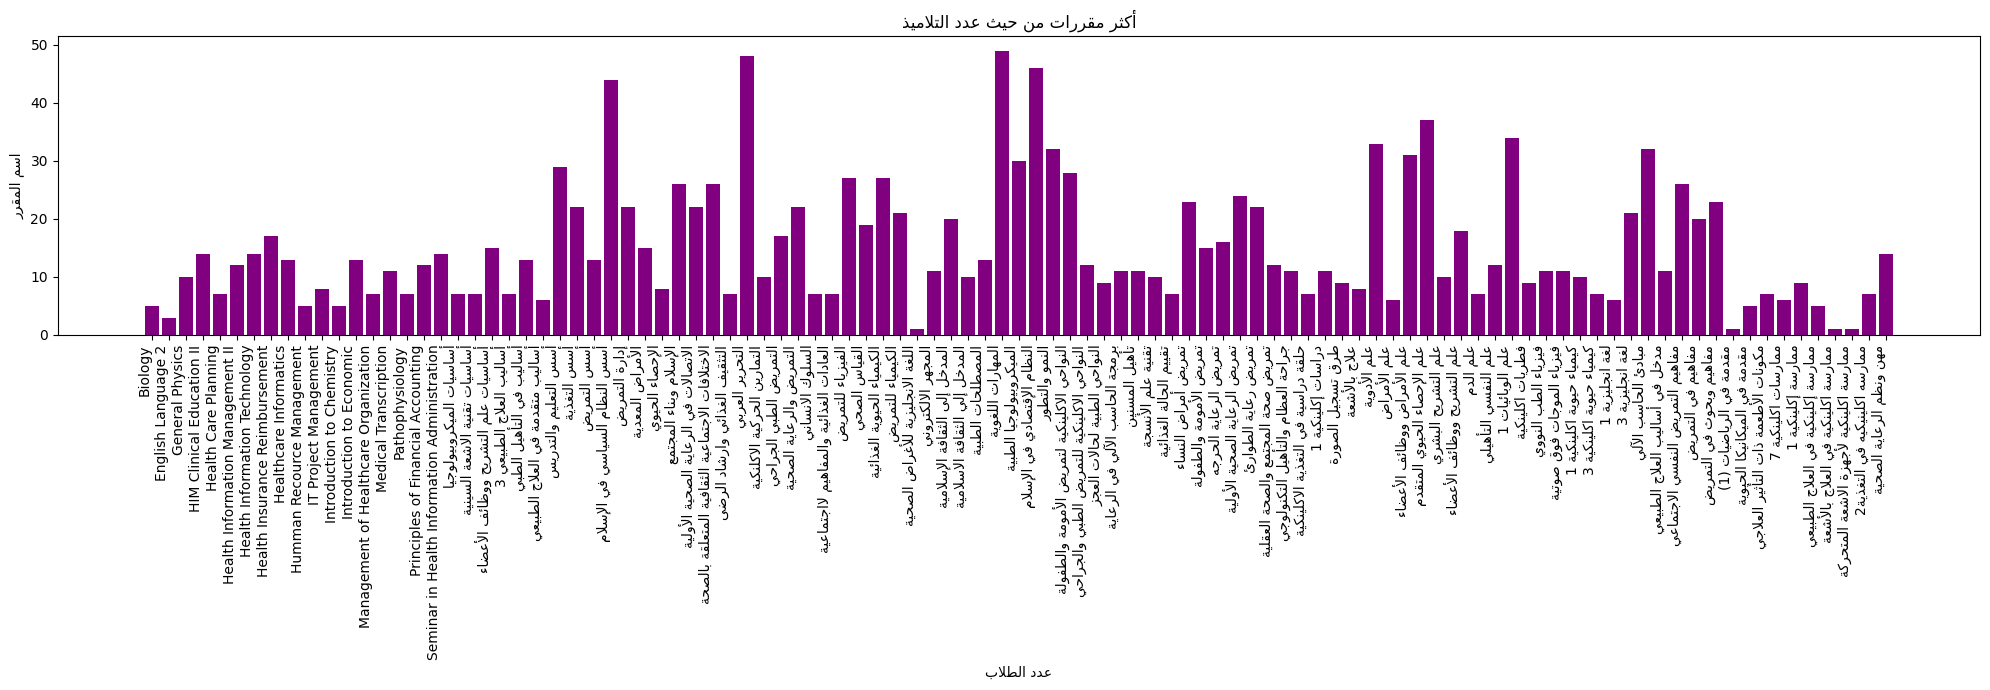

In [13]:
course_degrees = {name: G.degree(name) for name in  علوم_طبيه['اسم المقرر'].unique()}

# Reshape and fix Arabic for display
reshaped_labels = [fix(name) for name in course_degrees.keys()]

# Plot
plt.figure(figsize=(20, 7))
plt.bar(reshaped_labels, course_degrees.values(), color='purple')
plt.title(fix("أكثر مقررات من حيث عدد التلاميذ"))
plt.xlabel(fix("عدد الطلاب"))
plt.ylabel(fix("اسم المقرر"))
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()
    

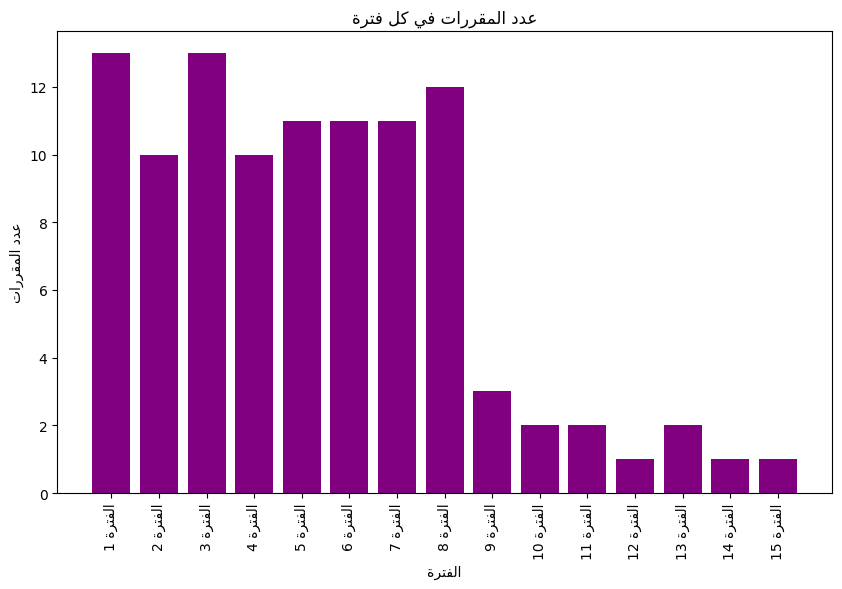

In [14]:
# Bar Chart لعدد المقررات في كل فترة
period_counts = pd.Series(color.values()).value_counts().sort_index()
period_counts.index = [f"الفترة {i + 1}" for i in period_counts.index]

plt.figure(figsize=(10, 6))
plt.bar([fix(period) for period in period_counts.index], period_counts.values, color="purple")
plt.title(fix("عدد المقررات في كل فترة"))
plt.xlabel(fix("الفترة"))
plt.ylabel(fix("عدد المقررات"))
plt.xticks(rotation=90)
plt.show()

In [15]:
schedule = {}
for course, period in color.items():
    course = str(course).strip()
    if period not in schedule:
        schedule[period] = []
    schedule[period].append(course)

exam_schedule = []
for period, courses in schedule.items():
    for course in courses:
        course_info = df[0][df[0]["اسم المقرر"] == course].iloc[0] if not df[0][df[0]["اسم المقرر"] == course].empty else {}
        course_code = course_info.get("رمز المقرر", "غير متوفر")
        num_students =  علوم_طبيه[ علوم_طبيه["اسم المقرر"] == course]["عدد الطلاب"].iloc[0] if not علوم_طبيه[ علوم_طبيه["اسم المقرر"] == course].empty else 0
        
        exam_schedule.append({
            "الفترة": period + 1,
            "رمز المقرر": course_code,
            "اسم المقرر": course,
            "عدد الطلاب": num_students
        })



In [16]:
# تحويل الجدول لـ DataFrame
exam_schedule_df = pd.DataFrame(exam_schedule)

output_path =r"C:\Users\shiko\Desktop\yasser\finalsheet.xlsx"
exam_schedule_df.to_excel(output_path, index=False, sheet_name="finalsheet")

print(f"تم تصدير الجدول إلى: {output_path}")

OSError: Cannot save file into a non-existent directory: 'C:\Users\shiko\Desktop\yasser'